<a href="https://colab.research.google.com/github/irbaadika/PCVK_Genap_2023/blob/main/Jobsheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Mount to drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#**Template Matching**

Menggunakan library openCV

**cv.match.Template()**, dengan parameter.

* **Image**: citra input
* **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
* **method**: metode dari template matching

jenis metode template matching di openCV:

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

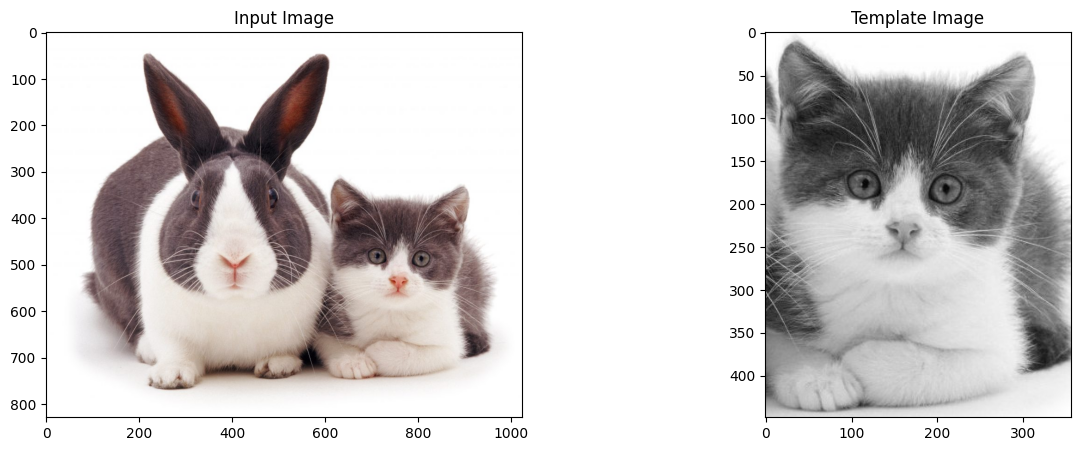

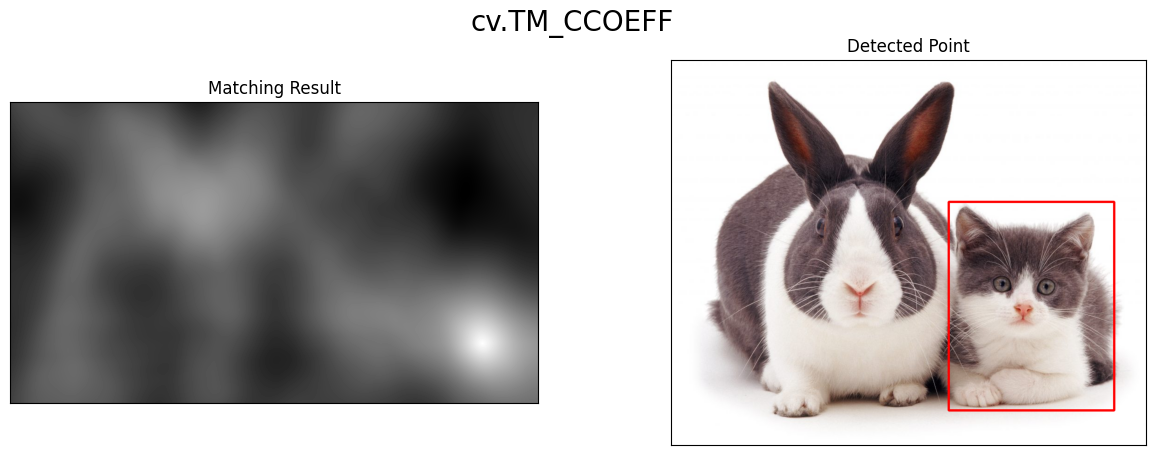

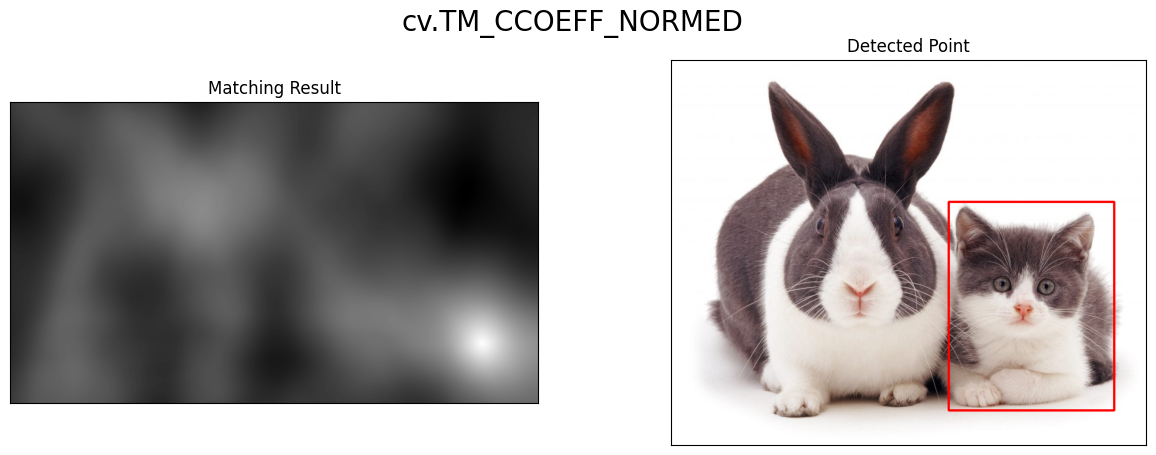

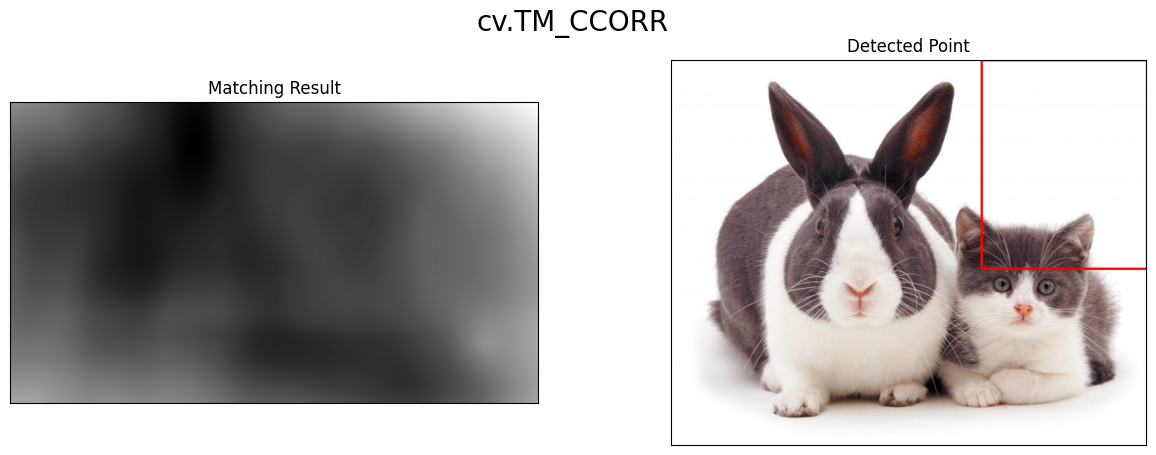

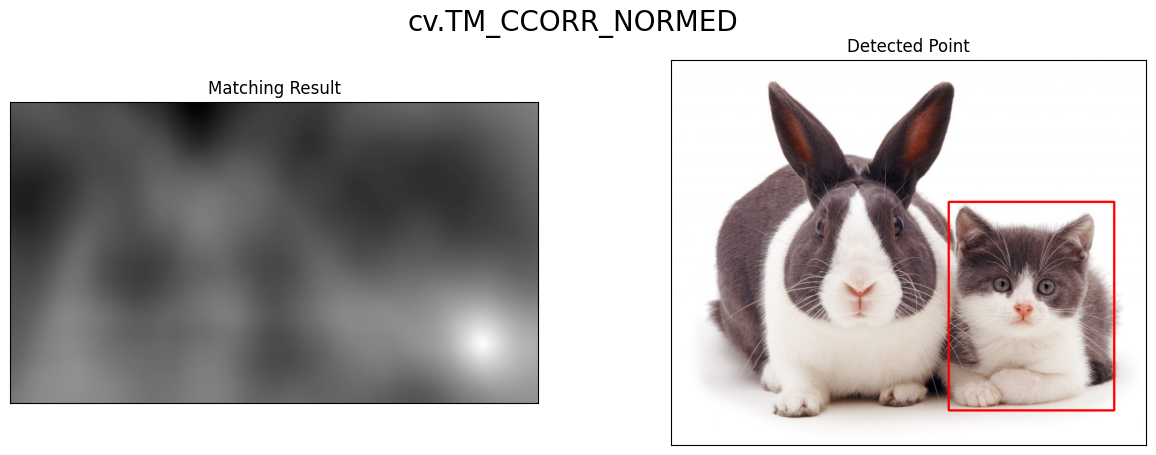

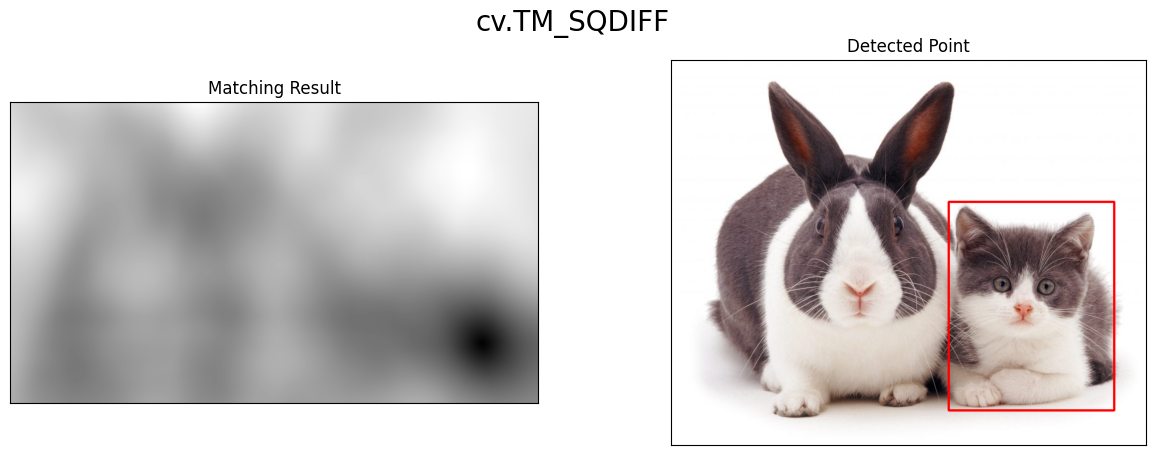

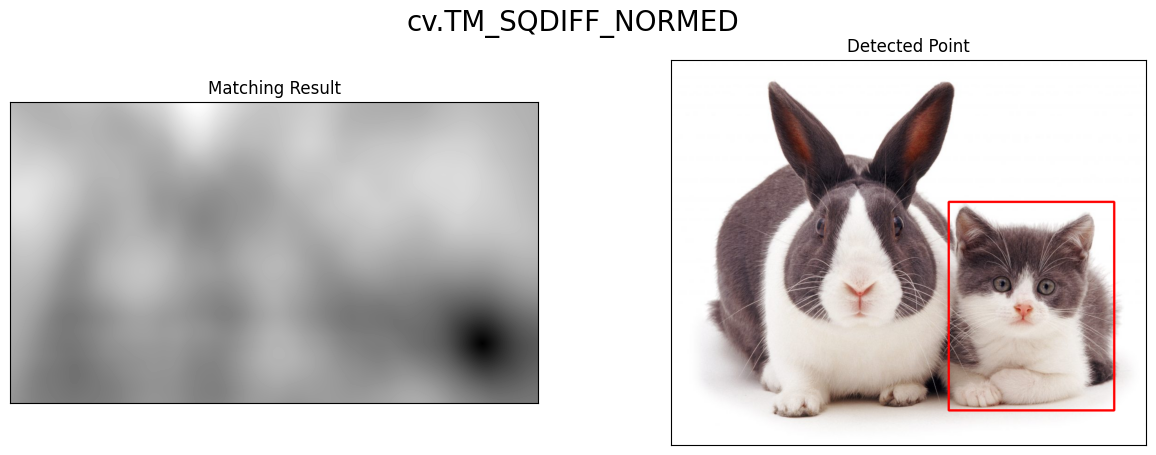

In [ ]:
img_cb = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img_cb, cv.COLOR_BGR2GRAY)
img_cb2 = img_cb.copy()
img_template = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = img_template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) # membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image") 
axarr[1].imshow(cv.cvtColor(img_template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# 6 methods
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img_cb = img_cb2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,img_template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # Jika methodnya TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img_cb, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

# **Template Macthing Tanpa Library**

Implementasikan konsep template matching tanpa menggunakan library OpenCV 
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan 
bahrain-template.jpg sebagai citra template

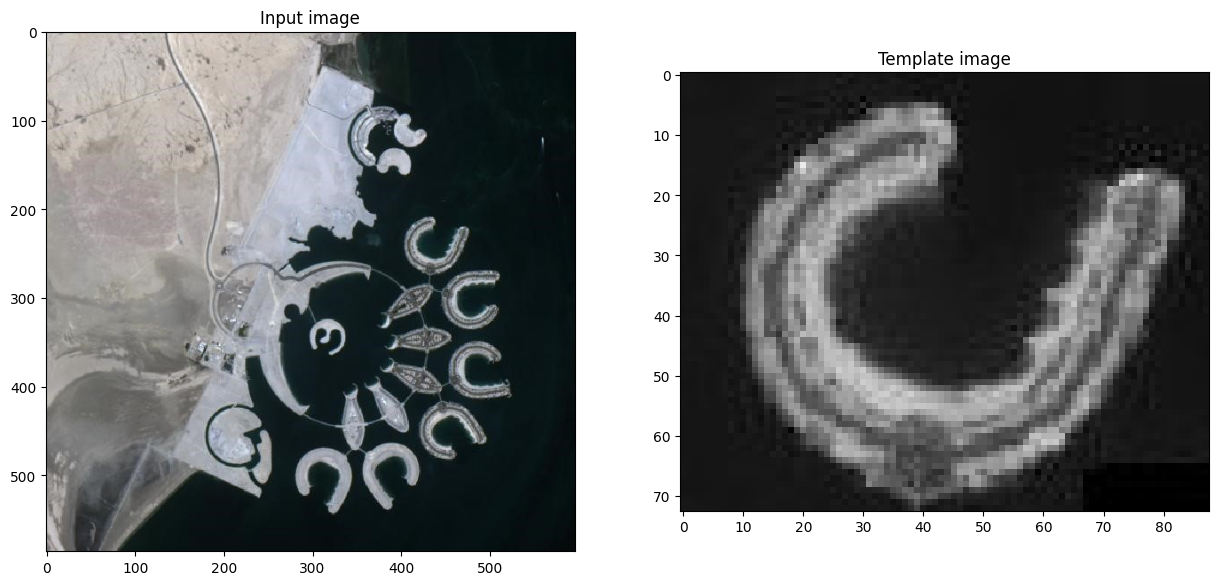

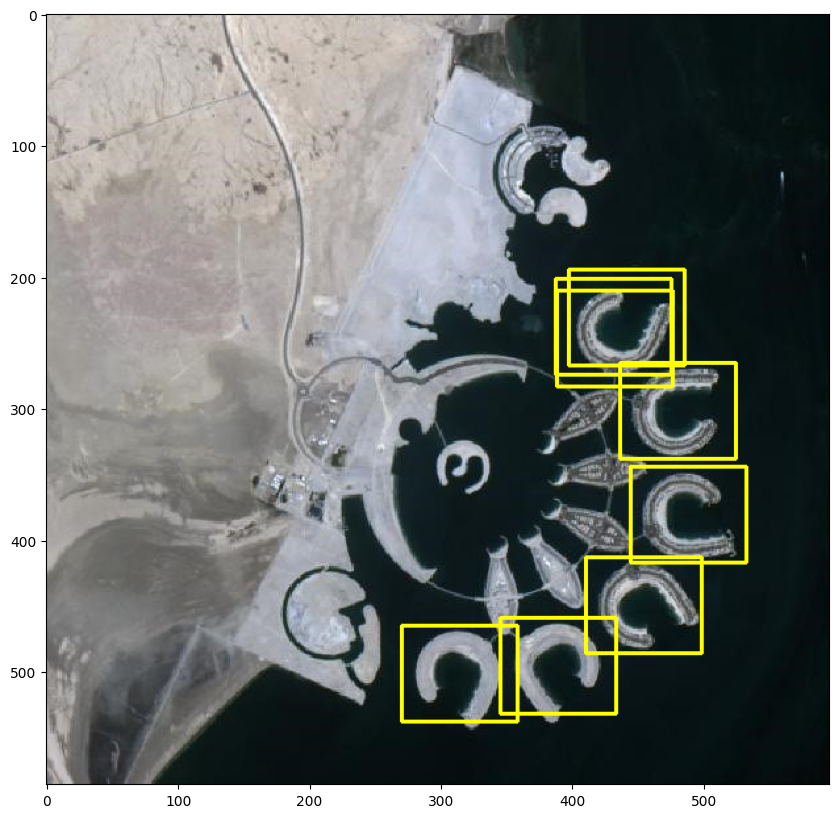

In [ ]:
# Load input image and convert to grayscale
img_bahrain = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img_bahrain, cv.COLOR_BGR2GRAY)

# Load template image
template = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/bahrain-template.jpg', 0)
w, h = template.shape[::-1]

# Display input and template images
f, axarr = plt.subplots(1, 2, figsize=(15, 10))
axarr[0].imshow(cv.cvtColor(img_bahrain, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
axarr[1].set_title("Template image")

# Match template in input image
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

# Set threshold value for detections
threshold = 0.47

# Find all locations where template matches above threshold
loc = np.where(res >= threshold)

# Initialize list of points to skip duplicates
lspoint_x = []
lspoint_y = []

# Loop through all locations where template matches above threshold
for i in range(len(loc[0])):
    # Get x and y coordinates of current location
    x = loc[1][i]
    y = loc[0][i]

    # Skip if location is a duplicate
    if x in lspoint_x and y in lspoint_y:
        continue

    # Draw bounding box around detected object
    cv.rectangle(img_bahrain, (x, y), (x + w, y + h), (0, 255, 255), 2)

    # Add current location to list of points to skip duplicates
    for j in range(x - 9, x + 9, 1):
        lspoint_x.append(j)

    for k in range(y - 9, y + 9, 1):
        lspoint_y.append(k)

# Display output image with bounding boxes
plt.figure(figsize=(15, 10))
plt.imshow(cv.cvtColor(img_bahrain, cv.COLOR_BGR2RGB))


# **Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection**

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

###**1. Sobel Edge Detection**

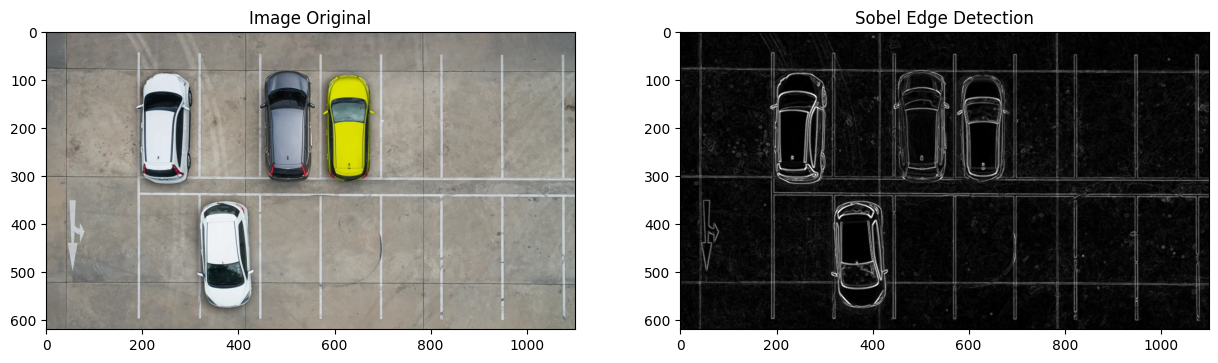

In [ ]:
img_carpark = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/car-park.jpg')

gray = cv.cvtColor(img_carpark, cv.COLOR_BGR2GRAY)

remove_noise = cv.GaussianBlur(gray,(3,3),0)

img_sobelx = cv.Sobel(remove_noise, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(remove_noise, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.title('Image Original')
axarr[0].imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy, cmap = 'gray')
plt.title('Sobel Edge Detection')
axarr[1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))

###**2. Canny Edge Detection**

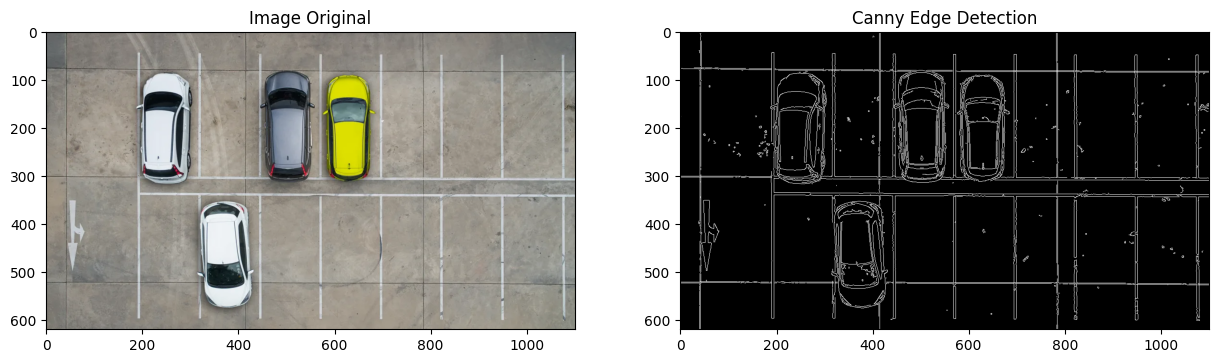

In [ ]:
img_carpark = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/car-park.jpg')
canny = cv.Canny(img_carpark, 100, 200)

f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.title('Image Original')
axarr[0].imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(canny, cmap = 'gray')
plt.title('Canny Edge Detection')
axarr[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))

###**3. Laplacian Edge Detection**

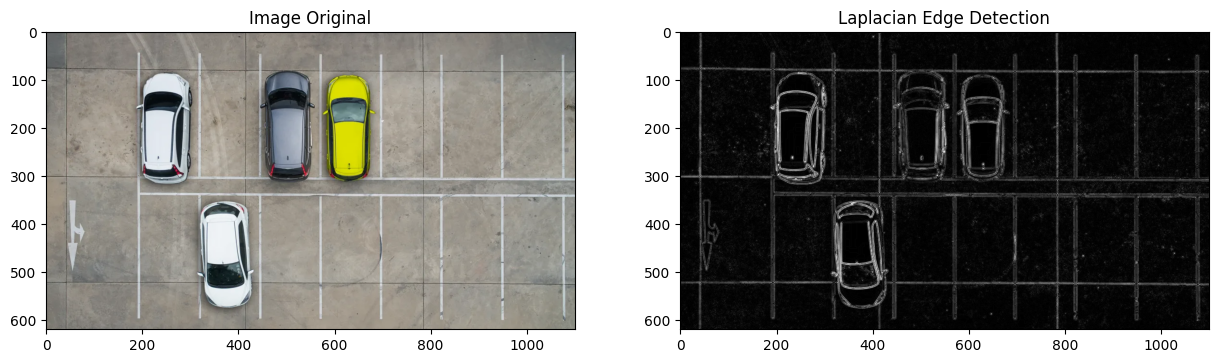

In [ ]:
img_carpark = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/car-park.jpg')
image_gray = cv.cvtColor(img_carpark, cv.COLOR_BGR2GRAY)

img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.title('Image Original')
axarr[0].imshow(cv.cvtColor(img_carpark, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(filtered_image, cmap = 'gray')
plt.title('Laplacian Edge Detection')
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

#**Harris Corner Detection dan Shi-Tomasi Detection**

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg

###**1. Harris Corner Detection**

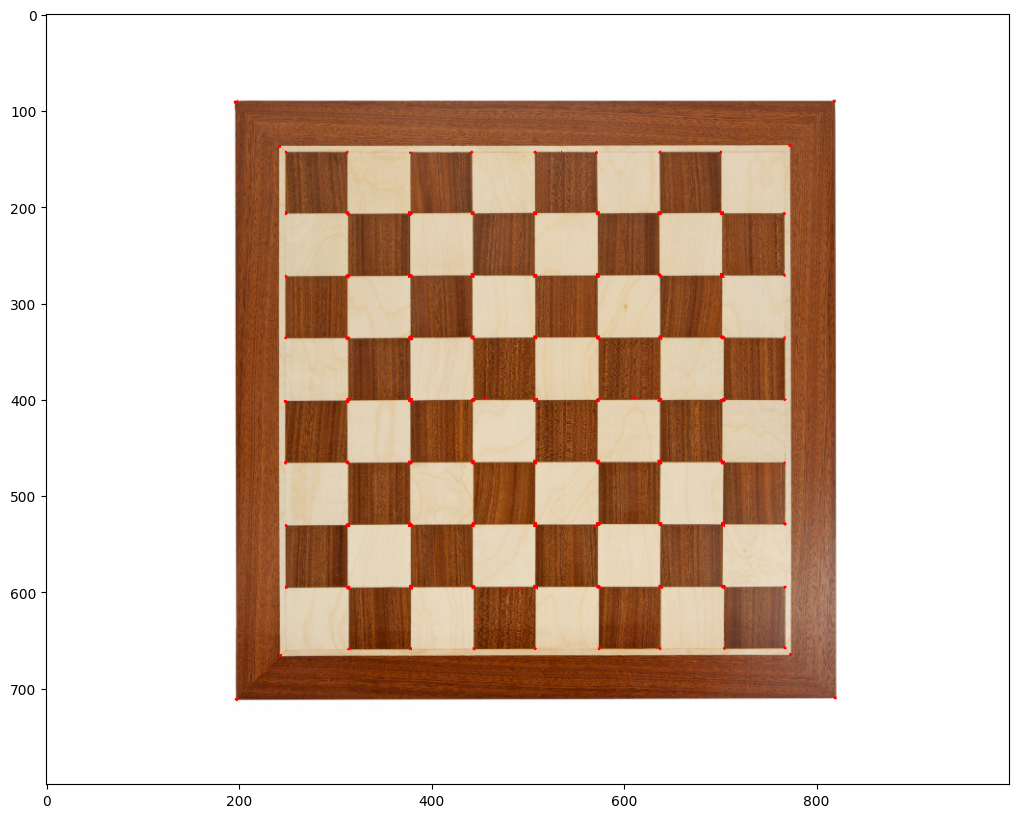

In [ ]:
img_chess = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)

harris_output = cv.dilate(harris_output, None)

img_chess[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(15,10)) 
plt.imshow(cv.cvtColor(img_chess, cv.COLOR_BGR2RGB))

###**2. Shi-Tomasi Detection**

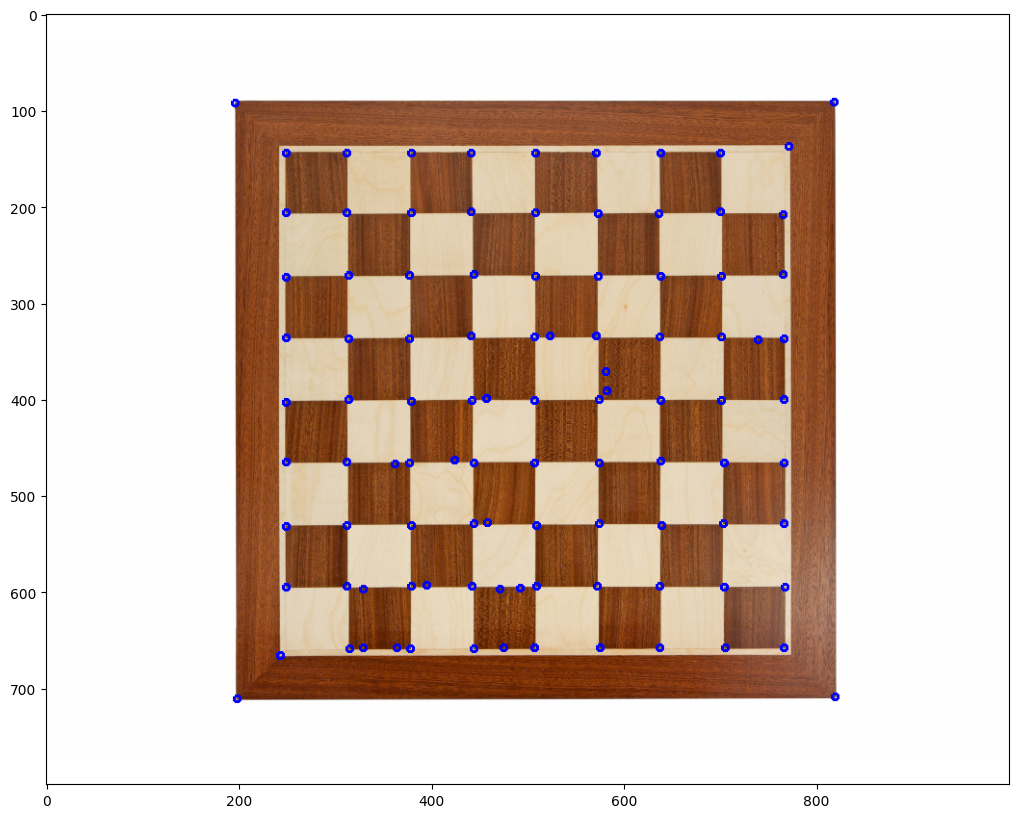

In [ ]:
img_chess = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(img_chess, (x,y),3,255,2)

plt.figure(figsize=(15,10)) 
plt.imshow(cv.cvtColor(img_chess, cv.COLOR_BGR2RGB))

#**Hough Transform**

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan 
teori

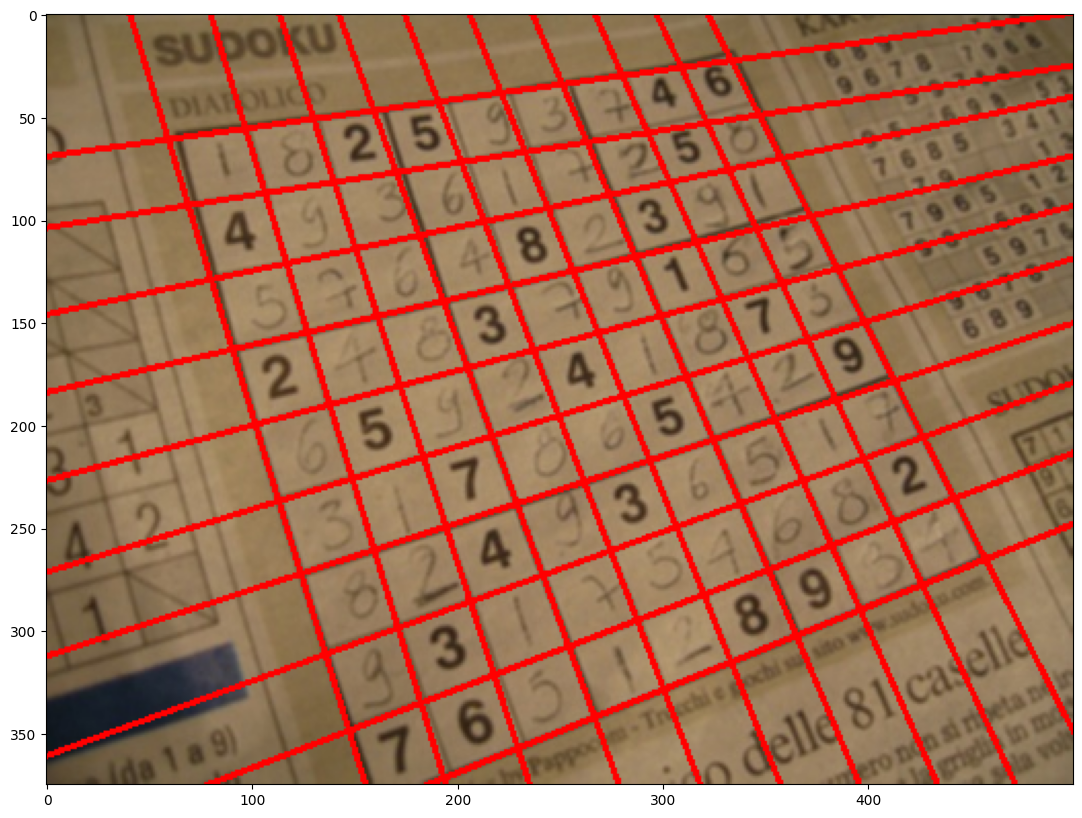

In [ ]:
img_sudoku = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/sudoku.jpg') 
img_gray = cv.cvtColor(img_sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue



        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_sudoku, (x1, y1), (x2,y2),(0,0,255),2)
        
plt.figure(figsize=(15,10)) 
plt.imshow(cv.cvtColor(img_sudoku, cv.COLOR_BGR2RGB))

#**Contour Detection**

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan 
menggunakan gambar laptop.jpg

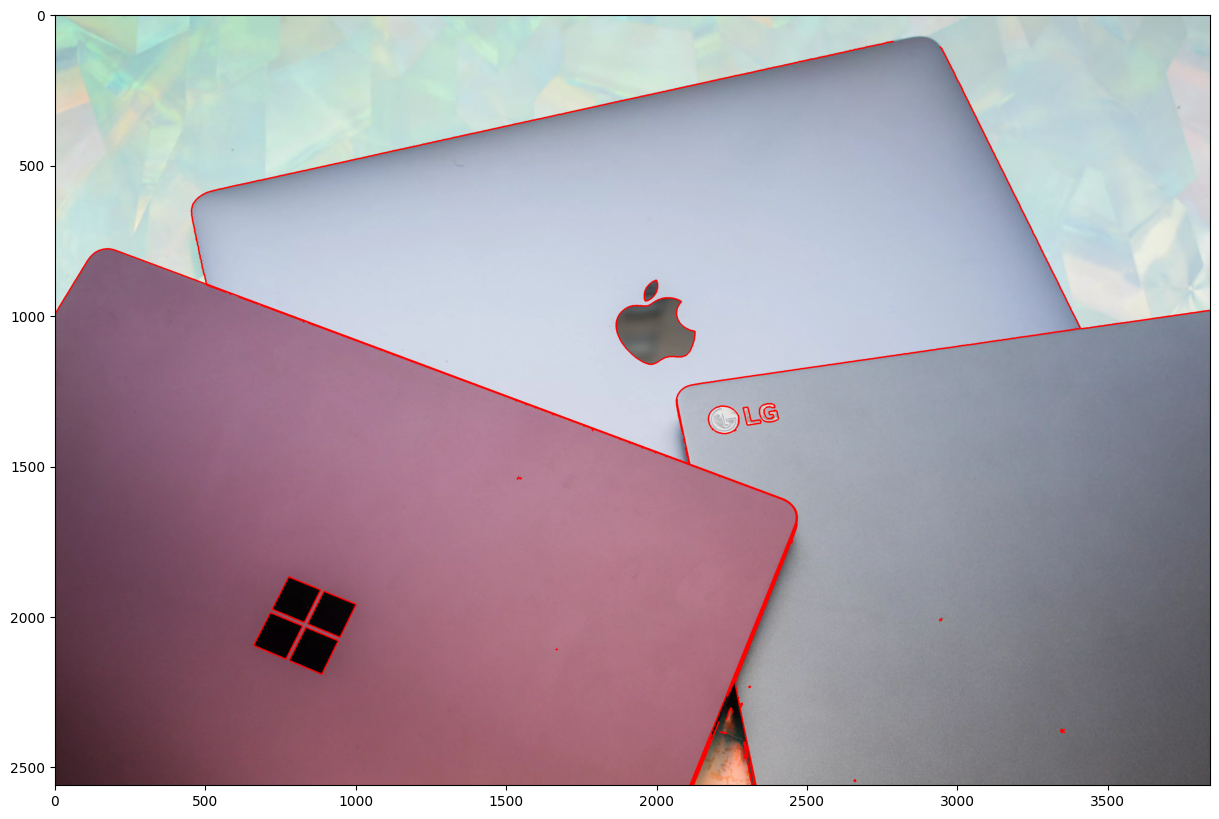

In [ ]:
img_laptop = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Object Detection/laptop.jpg') 
img_gray = cv.cvtColor(img_laptop, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img_laptop, contours, -1, (0,0,255), 3)

plt.figure(figsize=(15,10)) 
plt.imshow(cv.cvtColor(img_laptop, cv.COLOR_BGR2RGB))